In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.impute import SimpleImputer

2023-02-23 12:47:12.726711: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_3_filtered_cnn.pickle', 'rb') as handle:
        d = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/collocated_dict_5e_3_filtered_cnn.pickle'

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
384,-0.012150,-0.032903,329.650000,2484.919633,981.833176,983.035999,4.801381,4.852067,85.199704,84.816429,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,0.078067,-0.018678,328.049998,2485.081475,1018.852822,1020.094492,5.769578,5.773733,96.045652,96.170476,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-0.012150,-0.032903,262.404997,2490.861123,1017.304386,1018.553506,4.284894,4.316867,81.548054,80.939972,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-0.012150,-0.032903,344.449998,2477.154018,993.498046,994.705493,5.478307,5.527708,84.861454,84.644287,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,0.009946,-0.040725,332.674997,2482.830957,1005.523308,1006.754001,5.121342,5.164710,91.495950,91.405455,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.064698,0.066662,382.090001,2446.286109,1019.939140,1021.138998,9.228230,9.585403,88.167400,87.101354,...,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0
235,0.009946,-0.040725,304.839998,2490.234728,1014.029920,1015.279489,4.760158,4.772068,96.832301,97.017771,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,-0.012150,-0.032903,307.009996,2481.803889,999.423692,1000.634009,6.482827,6.486903,94.549654,94.577806,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-0.012150,-0.032903,351.980002,2478.168359,1019.863824,1021.104507,6.098199,6.111122,98.692553,98.937198,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [8]:
df = df.replace(-9.223372036854776e+18, 9999)

In [9]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

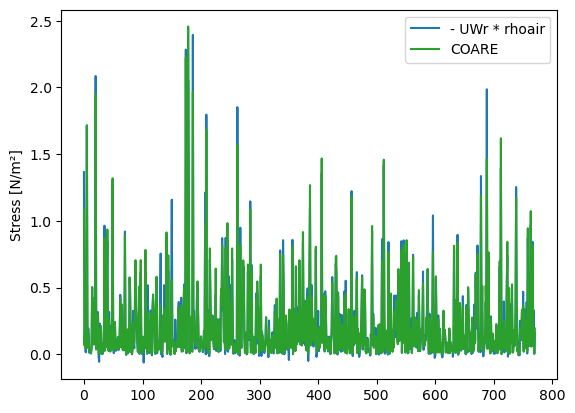

In [10]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [11]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

In [12]:
list_num_pixels = list(range(120))
s0_str = ['s0_' + str(n) for n in list_num_pixels]
inc_str = ['inc_' + str(n) for n in list_num_pixels]
az_str = ['az_' + str(n) for n in list_num_pixels]
#grid_lats_str = ['grid_lats_' + str(n) for n in list_num_pixels]
#grid_lons_str = ['grid_lons_' + str(n) for n in list_num_pixels]

predictor_variables = s0_str + inc_str + az_str #+ grid_lats_str + grid_lons_str

predictor_variables = ['s0', 'inc', 'az']

In [17]:
df[predictor_variables]

,s0_0,s0_1,s0_2,s0_3,s0_4,s0_5,s0_6,s0_7,s0_8,s0_9,...,az_110,az_111,az_112,az_113,az_114,az_115,az_116,az_117,az_118,az_119
384,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-11.0,-10.0,-14.0,-11.0,-12.0,-12.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-17.0,-18.0,-15.0,-18.0,-15.0,-15.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,-17.0,-16.0,-17.0,-16.0,-19.0,-16.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-8.0,-11.0,-11.0,-9.0,-9.0,-9.0,-11.0,-14.0,-13.0,-12.0,...,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0
235,-8.0,-6.0,-8.0,-7.0,-8.0,-7.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-24.0,-24.0,-26.0,-24.0,-23.0,-23.0,-24.0,-23.0,-20.0,-21.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [18]:
imp_mean = SimpleImputer(missing_values=9999, strategy='most_frequent')

In [19]:
x = imp_mean.fit_transform(df[predictor_variables])
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

In [20]:
x[0, 0]

-15.0

In [21]:
imp_mean = SimpleImputer(missing_values=-9.22337204e+18, strategy='constant')

In [22]:
x = imp_mean.fit_transform(x)
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

x = df[predictor_variables]
x

In [28]:
x.shape

(771, 360)

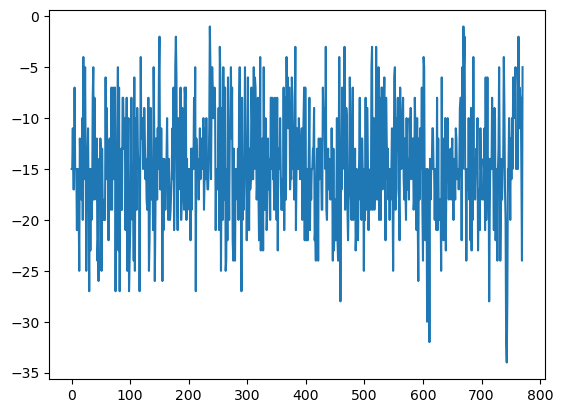

In [29]:
plt.plot(x[:, 0])

In [30]:
y = - df['UWr'] * df['rhoair']
y

384    1.364905
703    0.085199
547    0.171147
343    0.014584
155    0.153417
         ...   
293    0.842862
235    0.060775
596    0.330475
607    0.004852
727    0.157836
Length: 771, dtype: float64

In [31]:
y.isnull().values.sum()

0

# COARE

In [32]:
c = df['stress']

In [33]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [34]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [35]:
c_train = c[:split_idx]
c_test = c[split_idx:]

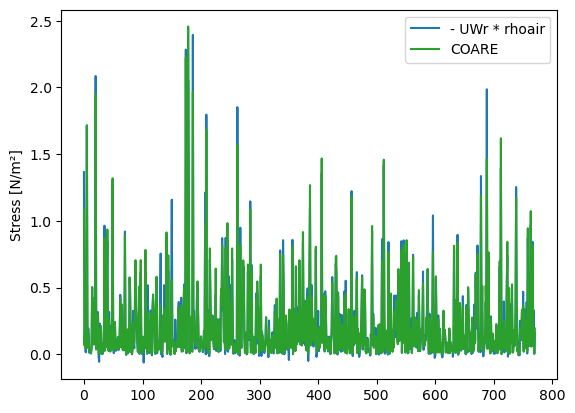

In [36]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [37]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [38]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [39]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-02-17 12:04:17.756092: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-17 12:04:17.758303: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-17 12:04:17.758314: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-17 12:04:17.758339: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-5l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-02-17 12:04:17.758689: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 61ms/step - loss: 130975.6205 - mean_absolute_error: 334.0589 - val_loss: 734.9343 - val_mean_absolute_error: 23.8719
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 6958.2391 - mean_absolute_error: 74.2226 - val_loss: 7190.5820 - val_mean_absolute_error: 83.8409
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 3790.9207 - mean_absolute_error: 54.3834 - val_loss: 1997.7734 - val_mean_absolute_error: 41.1748
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 1811.1197 - mean_absolute_error: 37.6390 - val_loss: 198.4360 - val_mean_absolute_error: 12.4885
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 343.8899 - mean_absolute_error: 15.5030 - val_loss: 273.3574 - val_mean_absolute_error: 12.7491
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 235.6093 - mean_absolute_error: 12.8171 - val_loss: 263.4400 - val_mean_

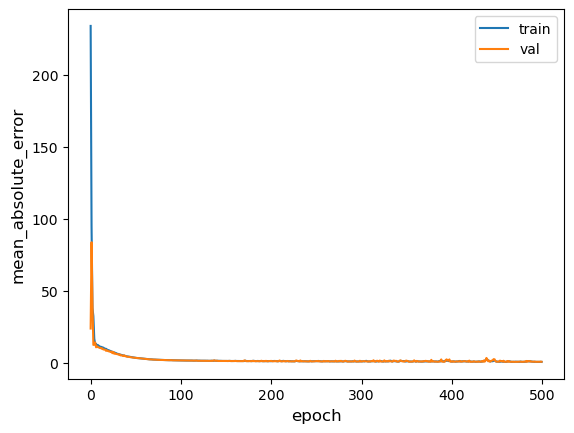

7/7 [==============================] - 0s 509us/step - loss: 1.2411 - mean_absolute_error: 0.7937
Test accuracy 0.7937391400337219
Test loss 1.2411243915557861


In [40]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [41]:
y_test_pred = multi_dense_model.predict(x_test)

In [42]:
np.mean(y_test)

0.19755932327375753

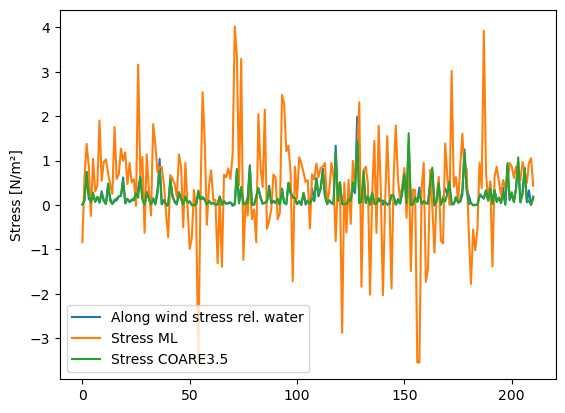

In [43]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [44]:
rmse(y_test.values, y_test_pred)

1.162929658501338

In [45]:
rmse(y_test.values, c_test)

0.06989463144562381

# Other experiments

In [46]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [47]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [48]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 0.4540 - mean_absolute_error: 0.4835 - val_loss: 2.8253 - val_mean_absolute_error: 1.6183
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1671 - mean_absolute_error: 0.2639 - val_loss: 0.3122 - val_mean_absolute_error: 0.4973
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1715 - mean_absolute_error: 0.2678 - val_loss: 5.2340 - val_mean_absolute_error: 2.2423
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1612 - mean_absolute_error: 0.2649 - val_loss: 0.1168 - val_mean_absolute_error: 0.2988
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1509 - mean_absolute_error: 0.2698 - val_loss: 0.2064 - val_mean_absolute_error: 0.3868
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1049 - mean_absolute_error: 0.2067 - val_loss: 0.4777 - val_mean_absolute_error: 0.6544
Epoch 7/500
25/25 [===

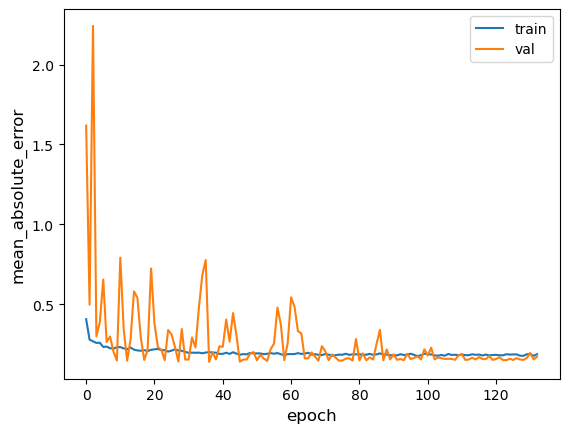

7/7 [==============================] - 0s 667us/step - loss: 0.0659 - mean_absolute_error: 0.1902
Test accuracy 0.19021464884281158
Test loss 0.06586166471242905


In [49]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [50]:
y_test_pred = multi_dense_model.predict(x_test)

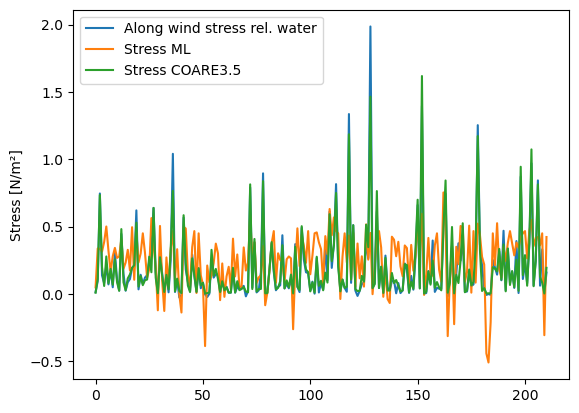

In [51]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [52]:
rmse(y_test.values, y_test_pred)

0.3501465642049103

In [53]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [54]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.49778604],
       [0.49778604, 1.        ]])

In [55]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [58]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 1.2169 - mean_absolute_error: 0.7882 - val_loss: 81.1275 - val_mean_absolute_error: 8.7786
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7098 - mean_absolute_error: 0.6109 - val_loss: 11.1848 - val_mean_absolute_error: 2.9798
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5535 - mean_absolute_error: 0.5358 - val_loss: 2.3314 - val_mean_absolute_error: 1.3893
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6818 - mean_absolute_error: 0.5459 - val_loss: 0.8490 - val_mean_absolute_error: 0.7033
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4065 - mean_absolute_error: 0.4781 - val_loss: 0.4317 - val_mean_absolute_error: 0.4871
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3126 - mean_absolute_error: 0.4260 - val_loss: 0.8660 - val_mean_absolute_error: 0.6926
Epoch 7/500
25/25 [=

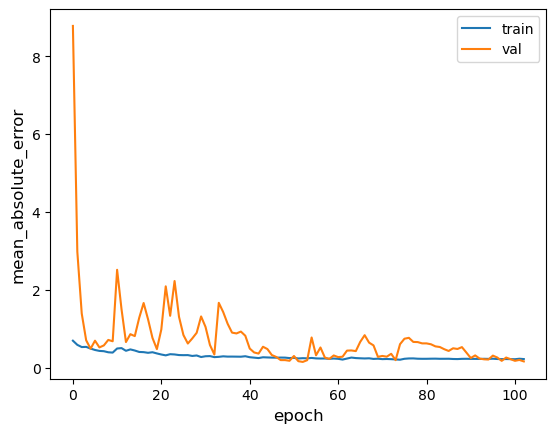

7/7 [==============================] - 0s 613us/step - loss: 0.0715 - mean_absolute_error: 0.1688
Test accuracy 0.16882391273975372
Test loss 0.07147792726755142


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_pred = multi_dense_model.predict(x_test)

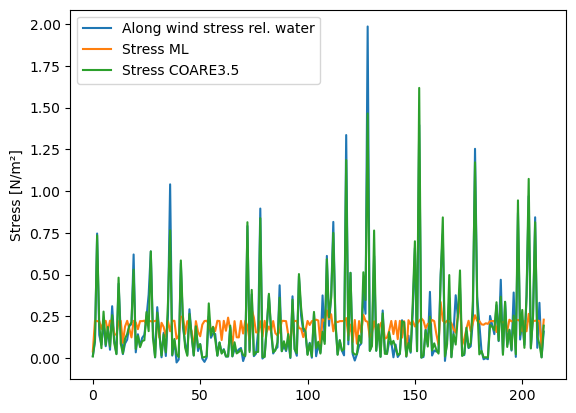

In [61]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [62]:
rmse(y_test.values, y_test_pred)

0.2819621277391458

In [63]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [64]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.29005936],
       [0.29005936, 1.        ]])

In [65]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [66]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [67]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [68]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 133ms/step - loss: 2.1935 - mean_absolute_error: 1.1392 - val_loss: 238.9503 - val_mean_absolute_error: 15.3337
Epoch 2/500
2/2 [==============================] - 0s 28ms/step - loss: 1.2326 - mean_absolute_error: 0.8360 - val_loss: 67.3920 - val_mean_absolute_error: 8.0557
Epoch 3/500
2/2 [==============================] - 0s 28ms/step - loss: 1.0194 - mean_absolute_error: 0.7410 - val_loss: 17.1997 - val_mean_absolute_error: 3.8987
Epoch 4/500
2/2 [==============================] - 0s 27ms/step - loss: 0.7151 - mean_absolute_error: 0.6263 - val_loss: 9.5790 - val_mean_absolute_error: 2.8637
Epoch 5/500
2/2 [==============================] - 0s 27ms/step - loss: 0.4894 - mean_absolute_error: 0.5222 - val_loss: 5.3406 - val_mean_absolute_error: 2.1295
Epoch 6/500
2/2 [==============================] - 0s 27ms/step - loss: 0.5936 - mean_absolute_error: 0.5762 - val_loss: 3.5147 - val_mean_absolute_error: 1.7525
Epoch 7/500
2/2 [=====

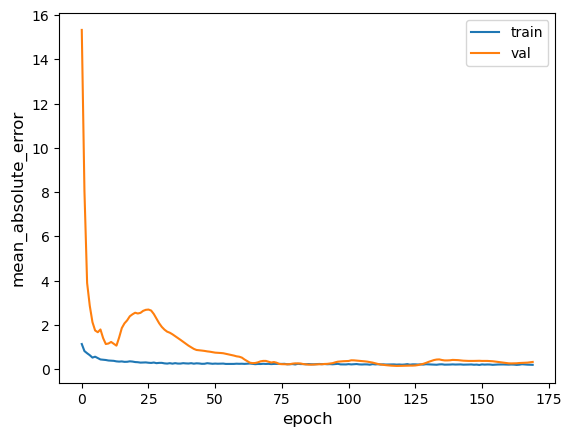

7/7 [==============================] - 0s 940us/step - loss: 0.1817 - mean_absolute_error: 0.3689
Test accuracy 0.3688715696334839
Test loss 0.1816738247871399


In [69]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [70]:
y_test_pred = multi_dense_model.predict(x_test)

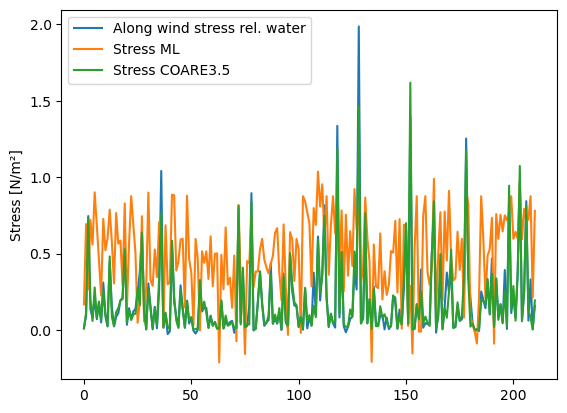

In [71]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [72]:
rmse(y_test.values, y_test_pred)

0.49080459964830314

In [73]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [74]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.38694397],
       [0.38694397, 1.        ]])

In [75]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

# CNN

For the CNN we neew to reshape s0, inc, and az vectors, to matrices of shape (num_records, 12, 10, num_variables).

In [89]:
s0_arr = ( df[s0_str].values ).reshape(df[s0_str].shape[0], 12, 10)
inc_arr = ( df[inc_str].values ).reshape(df[inc_str].shape[0], 12, 10)
az_arr = ( df[az_str].values ).reshape(df[az_str].shape[0], 12, 10)

In [94]:
x = np.stack([s0_arr, inc_arr, az_arr], axis=3)
x.shape

(771, 12, 10, 3)

In [95]:
x_train = x[:split_idx, :, :, :]
x_test = x[split_idx:, :, :, :]

In [96]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [97]:
x_train.shape

(560, 12, 10, 3)

# Other experiments

In [116]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [117]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [118]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 0.6525 - mean_absolute_error: 0.6451 - val_loss: 3.4447 - val_mean_absolute_error: 1.5941
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5077 - mean_absolute_error: 0.5337 - val_loss: 0.8789 - val_mean_absolute_error: 0.7173
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3122 - mean_absolute_error: 0.4389 - val_loss: 0.6358 - val_mean_absolute_error: 0.6575
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3327 - mean_absolute_error: 0.4265 - val_loss: 0.2866 - val_mean_absolute_error: 0.4143
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.2744 - mean_absolute_error: 0.3876 - val_loss: 0.1248 - val_mean_absolute_error: 0.2461
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.3383 - mean_absolute_error: 0.4445 - val_loss: 0.0934 - val_mean_absolute_error: 0.2500
Epoch 7/500
25/25 [===

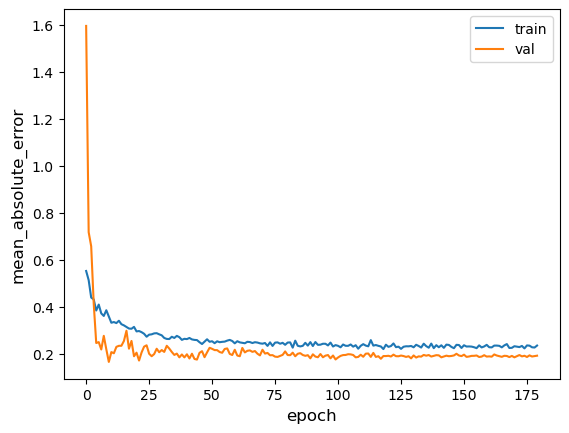

7/7 [==============================] - 0s 874us/step - loss: 0.0815 - mean_absolute_error: 0.2010
Test accuracy 0.20102308690547943
Test loss 0.08153479546308517


In [119]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [120]:
y_test_pred = multi_dense_model.predict(x_test)

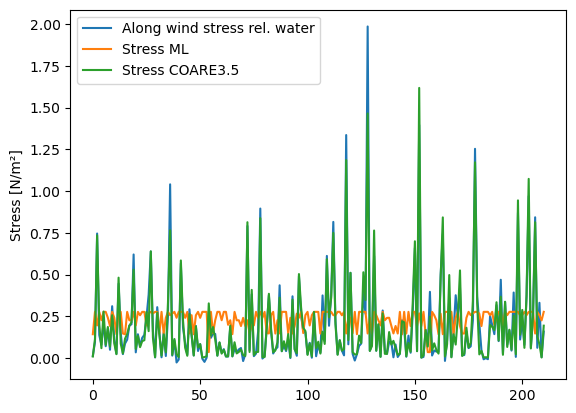

In [121]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [122]:
rmse(y_test.values, y_test_pred)

0.2849797633822681

In [123]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [124]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.01075601],
       [-0.01075601,  1.        ]])

In [125]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [172]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [173]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [174]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 0.9489 - mean_absolute_error: 0.7341 - val_loss: 0.1557 - val_mean_absolute_error: 0.3244
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4134 - mean_absolute_error: 0.5014 - val_loss: 0.2072 - val_mean_absolute_error: 0.3468
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3664 - mean_absolute_error: 0.4769 - val_loss: 0.1214 - val_mean_absolute_error: 0.2585
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3588 - mean_absolute_error: 0.4608 - val_loss: 0.0887 - val_mean_absolute_error: 0.2490
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3075 - mean_absolute_error: 0.4285 - val_loss: 0.1672 - val_mean_absolute_error: 0.3335
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4070 - mean_absolute_error: 0.4805 - val_loss: 0.1073 - val_mean_absolute_error: 0.2662
Epoch 7/500
25/25 [===

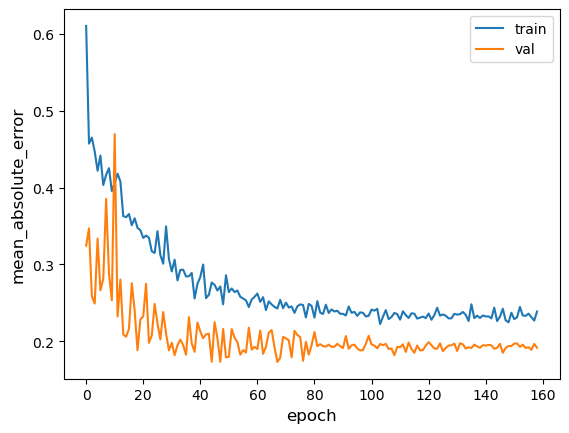

7/7 [==============================] - 0s 909us/step - loss: 0.0808 - mean_absolute_error: 0.1997
Test accuracy 0.1996665745973587
Test loss 0.08080457150936127


In [175]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [176]:
y_test_pred = multi_dense_model.predict(x_test)

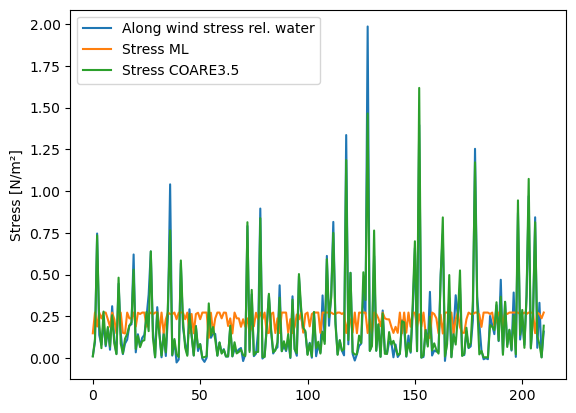

In [177]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [178]:
rmse(y_test.values, y_test_pred)

0.2839410634586748

In [179]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [180]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.00681212],
       [-0.00681212,  1.        ]])

In [181]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [182]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [183]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [184]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 0.7280 - mean_absolute_error: 0.6780 - val_loss: 1.1544 - val_mean_absolute_error: 0.8102
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3759 - mean_absolute_error: 0.4692 - val_loss: 0.4528 - val_mean_absolute_error: 0.5697
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3824 - mean_absolute_error: 0.4593 - val_loss: 0.2914 - val_mean_absolute_error: 0.4473
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3842 - mean_absolute_error: 0.4618 - val_loss: 0.0702 - val_mean_absolute_error: 0.2061
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3492 - mean_absolute_error: 0.4271 - val_loss: 0.0770 - val_mean_absolute_error: 0.2111
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3564 - mean_absolute_error: 0.4307 - val_loss: 0.0837 - val_mean_absolute_error: 0.1862
Epoch 7/500
25/25 [===

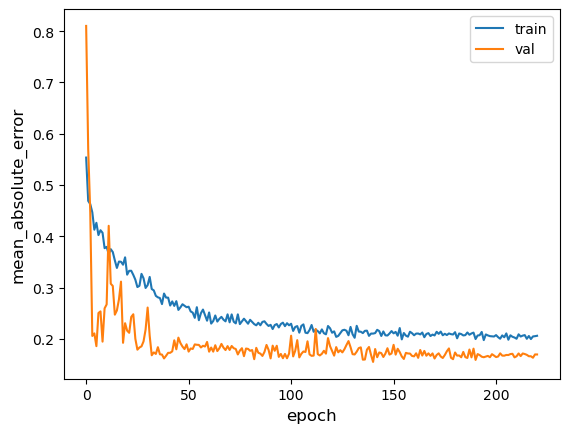

7/7 [==============================] - 0s 905us/step - loss: 0.0641 - mean_absolute_error: 0.1787
Test accuracy 0.17866677045822144
Test loss 0.06414642930030823


In [185]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [186]:
y_test_pred = multi_dense_model.predict(x_test)

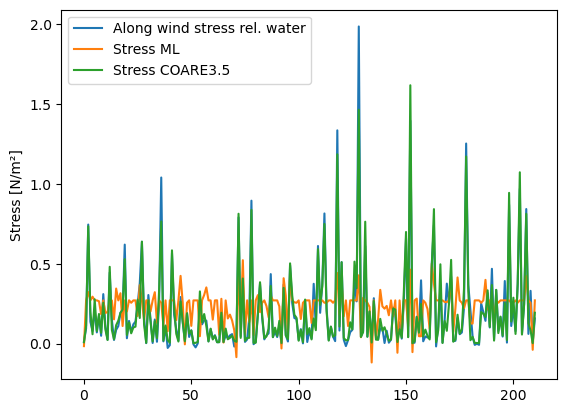

In [187]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [188]:
rmse(y_test.values, y_test_pred)

0.2981744114123416

In [189]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [190]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.43621712],
       [0.43621712, 1.        ]])

In [191]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [192]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [193]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [194]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 1.1827 - mean_absolute_error: 0.7863 - val_loss: 0.9746 - val_mean_absolute_error: 0.6903
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4610 - mean_absolute_error: 0.5250 - val_loss: 1.0486 - val_mean_absolute_error: 0.8826
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4404 - mean_absolute_error: 0.5062 - val_loss: 0.1720 - val_mean_absolute_error: 0.3081
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3328 - mean_absolute_error: 0.4537 - val_loss: 0.0888 - val_mean_absolute_error: 0.2249
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.2889 - mean_absolute_error: 0.4084 - val_loss: 0.0782 - val_mean_absolute_error: 0.1694
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3725 - mean_absolute_error: 0.4721 - val_loss: 0.0670 - val_mean_absolute_error: 0.1727
Epoch 7/500
25/25 [===

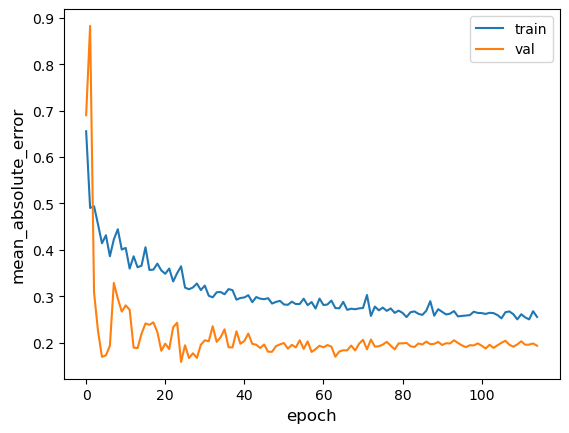

7/7 [==============================] - 0s 856us/step - loss: 0.0805 - mean_absolute_error: 0.1999
Test accuracy 0.1998530924320221
Test loss 0.08053174614906311


In [195]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [196]:
y_test_pred = multi_dense_model.predict(x_test)

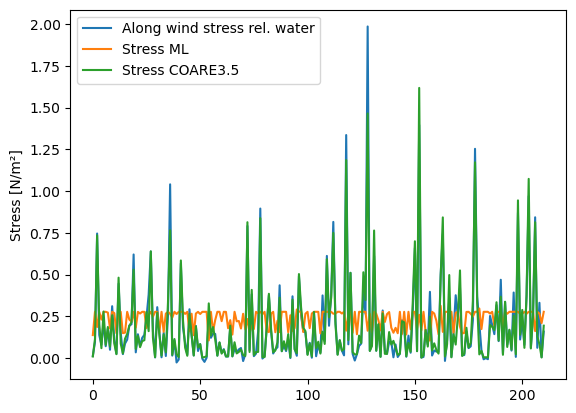

In [197]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [198]:
rmse(y_test.values, y_test_pred)

0.28521122313738106

In [199]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [200]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.0280033],
       [0.0280033, 1.       ]])

In [201]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [232]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [233]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [234]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 0.8977 - mean_absolute_error: 0.6924 - val_loss: 1.1018 - val_mean_absolute_error: 0.9244
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5472 - mean_absolute_error: 0.5878 - val_loss: 0.3503 - val_mean_absolute_error: 0.4376
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6088 - mean_absolute_error: 0.5930 - val_loss: 0.2839 - val_mean_absolute_error: 0.4533
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6319 - mean_absolute_error: 0.6075 - val_loss: 0.1632 - val_mean_absolute_error: 0.3114
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5610 - mean_absolute_error: 0.5497 - val_loss: 0.1218 - val_mean_absolute_error: 0.3039
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4297 - mean_absolute_error: 0.4949 - val_loss: 0.1878 - val_mean_absolute_error: 0.3473
Epoch 7/500
25/25 [===

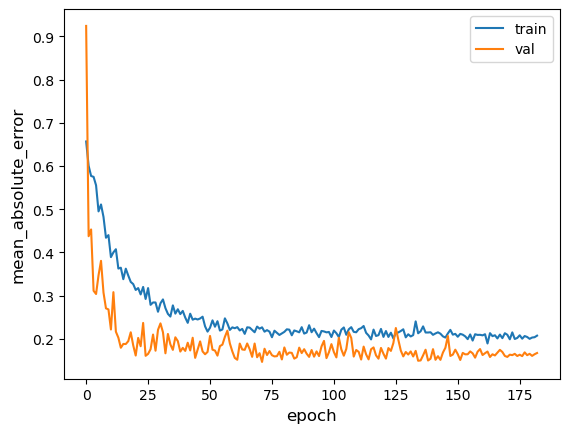

7/7 [==============================] - 0s 853us/step - loss: 0.0642 - mean_absolute_error: 0.1807
Test accuracy 0.1806512475013733
Test loss 0.0642382875084877


In [235]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [236]:
y_test_pred = multi_dense_model.predict(x_test)

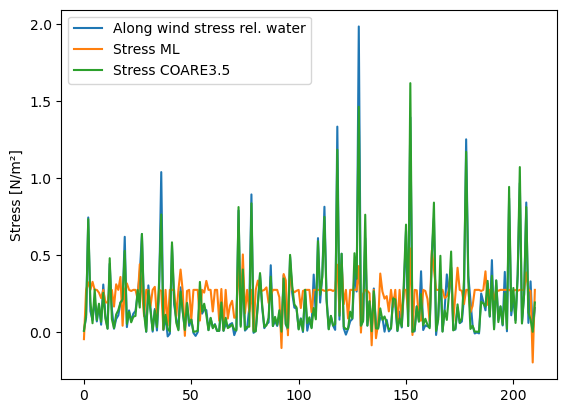

In [237]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [238]:
rmse(y_test.values, y_test_pred)

0.30153014004605305

In [239]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [240]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.43517815],
       [0.43517815, 1.        ]])

In [241]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [242]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [243]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [244]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.2499 - mean_absolute_error: 0.8628 - val_loss: 0.2455 - val_mean_absolute_error: 0.3930
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4820 - mean_absolute_error: 0.5476 - val_loss: 0.0893 - val_mean_absolute_error: 0.2361
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4249 - mean_absolute_error: 0.5135 - val_loss: 0.1123 - val_mean_absolute_error: 0.2695
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4462 - mean_absolute_error: 0.5246 - val_loss: 0.0969 - val_mean_absolute_error: 0.2624
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4743 - mean_absolute_error: 0.5617 - val_loss: 0.1249 - val_mean_absolute_error: 0.3164
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.3967 - mean_absolute_error: 0.4973 - val_loss: 0.0895 - val_mean_absolute_error: 0.2460
Epoch 7/500
25/25 [===

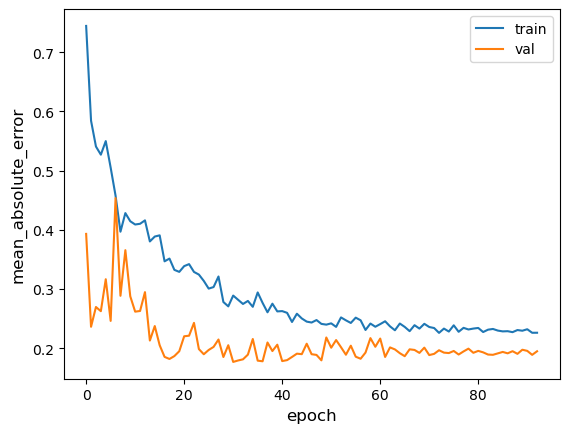

7/7 [==============================] - 0s 846us/step - loss: 0.0800 - mean_absolute_error: 0.2005
Test accuracy 0.20053137838840485
Test loss 0.07996778190135956


In [245]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [246]:
y_test_pred = multi_dense_model.predict(x_test)

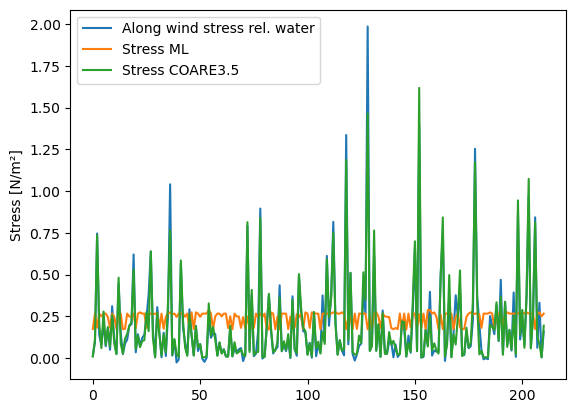

In [247]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [248]:
rmse(y_test.values, y_test_pred)

0.2833809056365285

In [249]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [250]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.01545177],
       [0.01545177, 1.        ]])

In [251]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [252]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [253]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [254]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 2.2308 - mean_absolute_error: 1.1324 - val_loss: 0.7330 - val_mean_absolute_error: 0.7193
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.8243 - mean_absolute_error: 0.6953 - val_loss: 0.1593 - val_mean_absolute_error: 0.3398
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6700 - mean_absolute_error: 0.6416 - val_loss: 0.4493 - val_mean_absolute_error: 0.4380
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5810 - mean_absolute_error: 0.6099 - val_loss: 0.6202 - val_mean_absolute_error: 0.5857
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6520 - mean_absolute_error: 0.6158 - val_loss: 0.2959 - val_mean_absolute_error: 0.4349
Epoch 6/500
25/25 [==============================] - 0s 4ms/step - loss: 0.5814 - mean_absolute_error: 0.5887 - val_loss: 0.3171 - val_mean_absolute_error: 0.4857
Epoch 7/500
25/25 [===

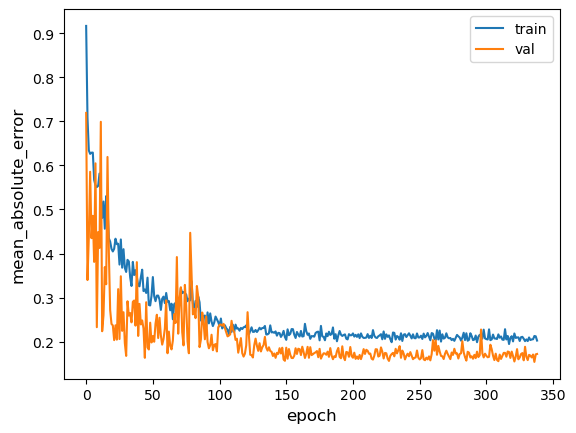

7/7 [==============================] - 0s 1ms/step - loss: 0.0727 - mean_absolute_error: 0.1942
Test accuracy 0.1941971778869629
Test loss 0.072740338742733


In [255]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [256]:
y_test_pred = multi_dense_model.predict(x_test)

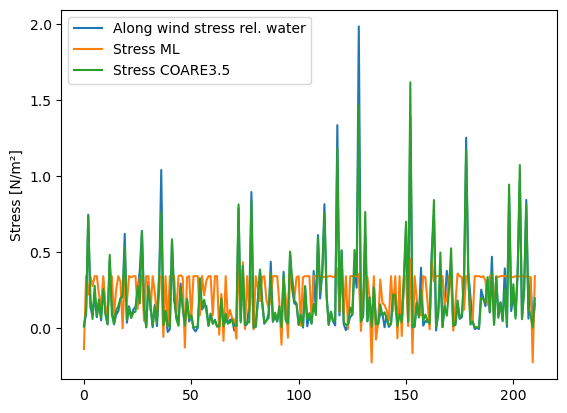

In [257]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [258]:
rmse(y_test.values, y_test_pred)

0.3174834115451324

In [259]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [260]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.34067216],
       [0.34067216, 1.        ]])

In [261]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [262]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [263]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [264]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 8ms/step - loss: 1.6214 - mean_absolute_error: 1.0501 - val_loss: 0.3952 - val_mean_absolute_error: 0.5326
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 0.9467 - mean_absolute_error: 0.7777 - val_loss: 0.1486 - val_mean_absolute_error: 0.2703
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.9737 - mean_absolute_error: 0.7327 - val_loss: 0.1762 - val_mean_absolute_error: 0.3180
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - mean_absolute_error: 0.6140 - val_loss: 0.0981 - val_mean_absolute_error: 0.1984
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5682 - mean_absolute_error: 0.6090 - val_loss: 0.2999 - val_mean_absolute_error: 0.4512
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5473 - mean_absolute_error: 0.5646 - val_loss: 0.2029 - val_mean_absolute_error: 0.3597
Epoch 7/500
25/25 [===

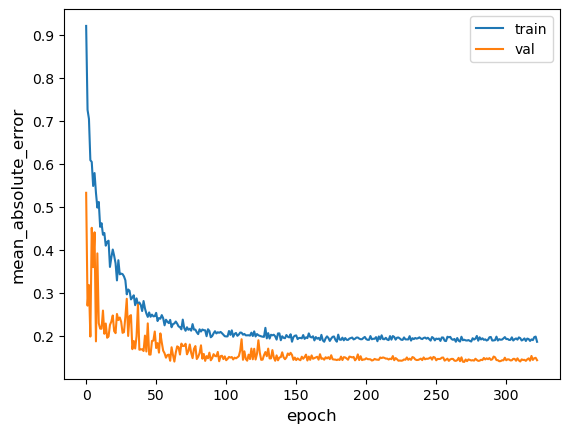

7/7 [==============================] - 0s 1ms/step - loss: 0.0519 - mean_absolute_error: 0.1593
Test accuracy 0.15934276580810547
Test loss 0.05188450217247009


In [265]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [266]:
y_test_pred = multi_dense_model.predict(x_test)

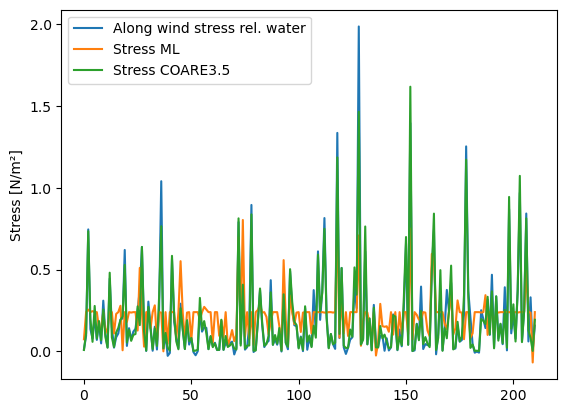

In [267]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [268]:
rmse(y_test.values, y_test_pred)

0.30581315544725546

In [269]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [270]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.58994189],
       [0.58994189, 1.        ]])

In [271]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

In [282]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [283]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [284]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 8ms/step - loss: 1.7254 - mean_absolute_error: 1.0182 - val_loss: 2.0233 - val_mean_absolute_error: 1.1576
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 1.1891 - mean_absolute_error: 0.8254 - val_loss: 0.4889 - val_mean_absolute_error: 0.5036
Epoch 3/500
25/25 [==============================] - 0s 4ms/step - loss: 0.8182 - mean_absolute_error: 0.7085 - val_loss: 0.2947 - val_mean_absolute_error: 0.4106
Epoch 4/500
25/25 [==============================] - 0s 4ms/step - loss: 0.6890 - mean_absolute_error: 0.6040 - val_loss: 0.1976 - val_mean_absolute_error: 0.3460
Epoch 5/500
25/25 [==============================] - 0s 4ms/step - loss: 0.7871 - mean_absolute_error: 0.6447 - val_loss: 0.1468 - val_mean_absolute_error: 0.2843
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5216 - mean_absolute_error: 0.5377 - val_loss: 0.1257 - val_mean_absolute_error: 0.2435
Epoch 7/500
25/25 [===

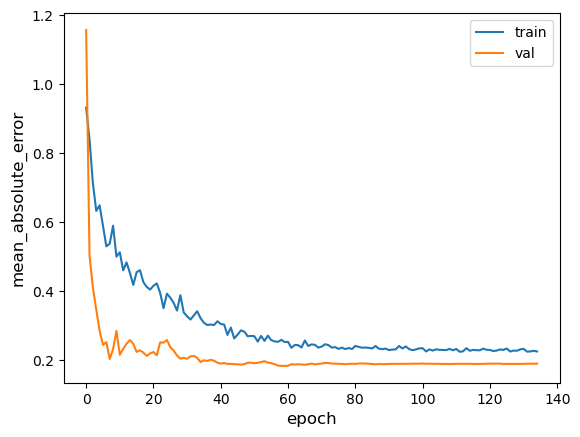

7/7 [==============================] - 0s 1ms/step - loss: 0.0795 - mean_absolute_error: 0.1950
Test accuracy 0.19500471651554108
Test loss 0.07953036576509476


In [285]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [286]:
y_test_pred = multi_dense_model.predict(x_test)

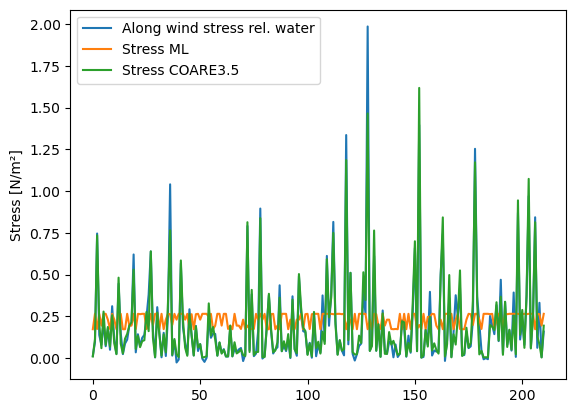

In [287]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [288]:
rmse(y_test.values, y_test_pred)

0.28214735765197385

In [289]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [290]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.00346339],
       [0.00346339, 1.        ]])

In [291]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])